# Understanding Convolutional Neural Network - Handwriting recognition of HINDI(devnagri) Alphabets

In [19]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.utils import np_utils, print_summary
import pandas as pd
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import keras.backend as K
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Model

In [8]:
K.set_image_data_format('channels_last')

def keras_model(image_x,image_y):
    num_of_classes = 37
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(image_x, image_y, 1), activation='sigmoid'))
    model.add(Conv2D(32, (5, 5),padding = 'Same',
                 activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))#used to handle Overfitting
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_of_classes, activation='softmax'))
    
    # Configuring our model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  

    return model

#### Reading Data

In [12]:
#extract the .7z file in the same directory
data = pd.read_csv(os.getcwd() +"/data.csv")
dataset = np.array(data)
np.random.shuffle(dataset)
X = dataset
Y = dataset
X = X[:, 0:1024]
Y = Y[:, 1024]

In [13]:
X_train = X[0:70000, :]
X_train = X_train / 255.
X_test = X[70000:72001, :]
X_test = X_test / 255.

In [14]:
Y = Y.reshape(Y.shape[0], 1)
Y_train = Y[0:70000, :]
Y_train = Y_train.T
Y_test = Y[70000:72001, :]
Y_test = Y_test.T
print("number of training examples = " + str(X_train.shape[0]))
print("number of test examples = " + str(X_test.shape[0]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

number of training examples = 70000
number of test examples = 2000
X_train shape: (70000, 1024)
Y_train shape: (1, 70000)
X_test shape: (2000, 1024)
Y_test shape: (1, 2000)


In [15]:
image_x = 32
image_y = 32
#one hot encoding
train_y = np_utils.to_categorical(Y_train)
test_y = np_utils.to_categorical(Y_test)
train_y = train_y.reshape(train_y.shape[1], train_y.shape[2])
test_y = test_y.reshape(test_y.shape[1], test_y.shape[2])
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(train_y.shape))
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

X_train shape: (70000, 32, 32, 1)
Y_train shape: (70000, 37)


In [23]:
print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
__________

### Running Model

In [17]:
model= keras_model(image_x, image_y)
obj=model.fit(X_train, train_y, validation_data=(X_test, test_y), epochs=15, batch_size=64)
scores = model.evaluate(X_test, test_y, verbose=0)
print("CNN Error: %.2f%%" % (100 - scores[1] * 100))


model.save('Hindi_new.h5')




Train on 70000 samples, validate on 2000 samples
Epoch 1/15
70000/70000 [==============================] - 73s 1ms/step - loss: 1.5154 - acc: 0.5742 - val_loss: 0.4239 - val_acc: 0.8865
Epoch 2/15
70000/70000 [==============================] - 70s 1ms/step - loss: 0.3963 - acc: 0.8784 - val_loss: 0.3122 - val_acc: 0.9135
Epoch 3/15
70000/70000 [==============================] - 71s 1ms/step - loss: 0.2920 - acc: 0.9103 - val_loss: 0.2211 - val_acc: 0.9395
Epoch 4/15
70000/70000 [==============================] - 71s 1ms/step - loss: 0.2429 - acc: 0.9240 - val_loss: 0.1900 - val_acc: 0.9470
Epoch 5/15
70000/70000 [==============================] - 70s 1ms/step - loss: 0.2086 - acc: 0.9354 - val_loss: 0.1787 - val_acc: 0.9470
Epoch 6/15
70000/70000 [==============================] - 67s 961us/step - loss: 0.1850 - acc: 0.9426 - val_loss: 0.1464 - val_acc: 0.9555
Epoch 7/15
70000/70000 [==============================] - 67s 962us/step - loss: 0.1642 - acc: 0.9480 - val_loss: 0.1402 - val_

#### PLOTTING ACCURACY

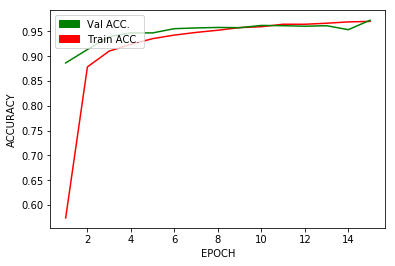

In [20]:
import matplotlib.patches as mpatches
line1=plt.plot(range(1,16),obj.history['acc'],'r-' )
line2=plt.plot(range(1,16),obj.history['val_acc'],'g-')
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY")

red_patch = mpatches.Patch(color='red', label='Train ACC.')
green_patch = mpatches.Patch(color='green', label='Val ACC.')
plt.legend(handles=[green_patch,red_patch], loc=2)


#### PLOTTING ERROR

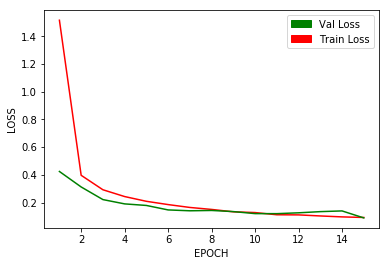

In [21]:
line1=plt.plot(range(1,16),obj.history['loss'],'r-' )
line2=plt.plot(range(1,16),obj.history['val_loss'],'g-')
plt.xlabel("EPOCH")
plt.ylabel("LOSS")

red_patch = mpatches.Patch(color='red', label='Train Loss')
green_patch = mpatches.Patch(color='green', label='Val Loss')
plt.legend(handles=[green_patch,red_patch], loc=1)


In [22]:

K.clear_session();